In [164]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from itertools import product
import time

In [219]:
data = np.loadtxt('EarthquakeExerciseData.txt')
scaled_data = 1 + data/max(data) # for plotting purposes
# adding 1 to the obvs value to ensure outward projection, (cos and sin values of the )
print(data, scaled_data)

[1.55758659 2.0316965  2.52715947 2.67239248 3.05568839 3.22610057
 3.41383678 2.93496936 2.5745155  2.6488389  2.92538705 3.19648313
 4.56582013 7.40090382 9.63326784 7.01610236 4.50819382 2.73295254
 1.72549381 1.40106983 1.42774271 0.86918963 1.20265293 0.58311545
 1.12071793 1.01055188 0.88079339 0.88351808 1.08990613 1.26999609] [1.16168829 1.21090418 1.26233668 1.27741287 1.31720164 1.33489161
 1.35437993 1.30467017 1.26725256 1.27496784 1.30367546 1.33181711
 1.47396379 1.76826514 2.         1.72832008 1.46798178 1.28369942
 1.17911822 1.14544076 1.14820959 1.09022791 1.12484371 1.06053143
 1.11633829 1.10490229 1.09143246 1.0917153  1.11313981 1.1318344 ]


### Building spherical coordinate system

In [214]:
S=2000 # number of points on the spiral
rate=25 # angular rate of spiral
sd=0.2 # standard deviation of the sensor Gaussian noise

# building the spherical coordinate system as done in setup file
x=np.zeros(S)
y=np.zeros(S)
for s in range(S):
    theta=rate*2*np.pi*s/S 
    r=s/S
    x[s]=r*np.cos(theta)
    y[s]=r*np.sin(theta)


### Computing station locations

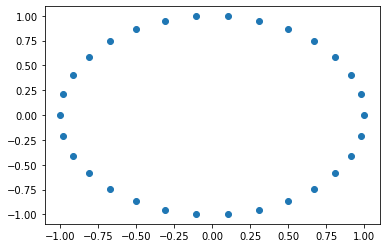

In [215]:
# getting positions of the stations    
N=len(data) # number of stations
sd=0.2 # standard deviation of the sensor noise
x_sensor = np.zeros(N)
y_sensor = np.zeros(N)
for sensor in range(N):
    theta_sensor = 2*np.pi*sensor/N
    x_sensor[sensor] = np.cos(theta_sensor)
    y_sensor[sensor] = np.sin(theta_sensor)

# plotting positions of the stations
plt.scatter(x_sensor, y_sensor)

### Building hypothesis space

In [235]:
# Building hypothesis space
# earthquakes are said to be independent, hence the value function is called independently at every station
build = time.time()
v = np.zeros((S,N))
for s1,s2 in product(range(0,S), range(0,S)):
    for i in range(N):
        v[s1][i]=value(x[s1],y[s1],x_sensor[i],y_sensor[i]) + value(x[s2],y[s2],x_sensor[i],y_sensor[i])+ 0.2*np.random.randn() # explosion value
print('Took',time.time() - build,'seconds to build hypothesis space')

Took 1037.3132030963898 seconds to build hypothesis space


In [236]:
np.savetxt('hypothesis.csv', v, delimiter=',', fmt='%d')

### Computing/Plotting posterior distribution
Given that prior is uniform, posterior is proportional to the likelihood.

In [237]:
##loading hypothesis to avoid running script above
#v = np.loadtxt('hypothesis.csv', dtype='str,int', delimiter=',', unpack=True)

In [238]:
# Determine likelihood, p(location|observed sensor values), given these sensor values
prob=np.zeros(S)
for s in range(0,S):
    prob[s] += -0.5*np.prod(data -v[s])**2/(sd**2) # follows gaussian distribution (as shown in BRML)
like=np.exp(prob)/np.sqrt(2*np.pi*(sd**2))

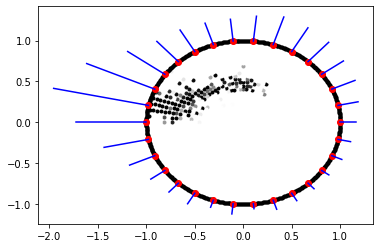

In [239]:
plt.figure()
# plotting posterior
for s in range(0,S):
    plt.plot(x[s],y[s],".",color=(1-(like[s]/max(like)))*np.array([1,1,1]))


# plottling perimeter
for theta in np.arange(0,2*np.pi,0.01):
    plt.plot(np.cos(theta),np.sin(theta),".",color=[0,0,0])

# plotting station locations
for sensor in range(0, N):
    plt.plot(x_sensor[sensor],y_sensor[sensor],"o",color=[1,0,0])

# plotting observed values at each sensor (spikes shown in fig (1.3))
for sensor in range(N):
    scale =1
    theta_sensor = 2*np.pi*sensor/N
    base = [x_sensor[sensor],((scaled_data[sensor])*np.cos(theta_sensor))] 
    top = [y_sensor[sensor], ((scaled_data[sensor])*np.sin(theta_sensor))]
    plt.plot(base, top,"-",color='b')


plt.show()